In [ ]:
pip install numpy


In [ ]:
pip install matplotlib

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

y=-15.07x+19.79


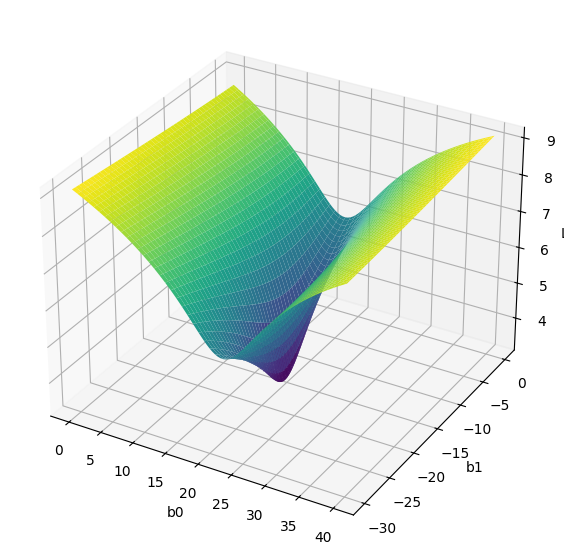

In [5]:
n=1000
x=np.random.normal(3,5,size=n)
y=-15*x+20.0+np.random.normal(0,5,size=n)
X=np.sum(x)
Y=np.sum(y)
b1=(n*np.dot(x,y)-Y*X)/(n*np.dot(x,x)-X**2)
b0=(Y-b1*X)/n
b1,b0=round(b1,2),round(b0,2)
print(f"y={b1}x+{b0}")

def MSE(b0,b1,x,y):
    pred=b0+b1*x
    loss=np.sum((pred-y)**2)/len(x)
    return loss

b0Value=np.linspace(0,40,100)
b1Value=np.linspace(-30,0,100)
Z=np.zeros((len(b0Value),len(b1Value)))
for i in range(len(b0Value)):
    for j in range(len(b1Value)):
        Z[i,j]=np.log(MSE(b0Value[i],b1Value[j],x,y))

fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(111,projection='3d')
B0,B1=np.meshgrid(b0Value,b1Value)
ax.plot_surface(B0,B1,Z,cmap='viridis')
ax.set_xlabel('b0')
ax.set_ylabel('b1')
ax.set_zlabel( 'Loss')
plt.show()

In [4]:
#r .....Array........
a=np.array([1,2,3])
b=np.array([(1.5,2,3),(4,5,6)],dtype=float)
c=np.array([[(1.5,2,3),(4,5,6)],[(3,2,1),(4,5,6)]],dtype=float)
zeroarray=np.zeros((3,4))
onesArray=np.ones((2,3,4),dtype=np.int16)
d=np.arange(10,25,5)
tempArray=np.linspace(0,10,17) 
constArray=np.full((3,2),6)   
identityMatrix=np.eye(3)#mkkjkjk
randomArray=np.random.random((3,3))
emptyArray=np.empty((4,5))





In [41]:
#.....Array Computation
a1=np.array([(1,3),(2,3)])
b1=np.array([(3,5),(9,7)])
subtraction=np.subtract(b1,a1)
addation=np.add(a1,b1)
print(f"subtraction a1 from b1  ={subtraction}")
print(f"addation ={addation}")
print(f"dividation of b1/a1 ={np.divide(b1,a1)}")
print(f"multiplying a1 and b1 ={np.multiply(a1,b1)}")
print(f"power a1 of 3 ={np.vdot(a1,b1)}")


subtraction a1 from b1  =[[2 2]
 [7 4]]
addation =[[ 4  8]
 [11 10]]
dividation of b1/a1 =[[3.         1.66666667]
 [4.5        2.33333333]]
multiplying a1 and b1 =[[ 3 15]
 [18 21]]
power a1 of 3 =57
